### Exploring the Data

1. Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

Problems noticed during exploratory analysis:
 * Some weeks are listed as floats instead of integers. That **will** need to be changed. Or the integers need to be changed to floats?
 * <s>Artist name is inverted. There should be a pretty simple formula to un-invert it so that it reads properly</s>
 * <s>'time' should be called 'length'</s>
 * It would be great to add a few columns that contain arithmetic functions
     * Something that calculates how long it took a track to peak
     * Something that calculates how long between something's peak and it's disappearance from charts
     * Something that calculates the lifespan of a track. 
 * There are no values in columns after the 67th week, perhaps earlier. Figuring out where the data stops might be tricky. I can just go through and delete the columns I know are empty, and that should allow me to run a describe again with the new final data. _Created a for loop to solve this problem instead_
 * Track length is an object, it shoudl be a number that math can be performed on. The same goes for date entered and date-peaked

In [97]:
import pandas as pd
import numpy as np

billboard = pd.read_csv('billboard.csv')
# I've commented them out for ease of running, but the exploratory work I did is below.
# print billboard.head()
# print billboard.tail()
print billboard.describe()
# This for loop iterates through the column names and removes any column that is empty.
# This can be done because no track was on the billboard list for longer than 65 weeks.
for x in billboard.columns:
    if billboard[x].count() == 0:
        billboard.drop(x,1,inplace=True)

# This goes through and changes the column heading for the week by week ranking so that
# there is no leading x.
for x in billboard.columns:
     if x.startswith('x'):
        billboard.rename(columns=lambda x: x.replace('x', ''), inplace=True)
        #print x[1:]

# Let's rename the columns for the weeks so that they're just numbers. That way we can do math on
# them later.
for x in billboard.columns:
    if 'week' in x:
        dot_loc = x.index('.')
        billboard.rename(columns={x:x[:dot_loc-2]}, inplace=True)

# Fill in Blank values with 0s

# billboard.fillna(0,inplace=True)
# I'm going to work here on getting artist names in their proper form


# This changes the artist column to be in proper form, not phone book form.
for x in billboard['artist.inverted']:
    if ',' in x:
        comma_loc = x.index(',')
        proper_name = x[comma_loc+2:]+' '+x[:comma_loc]
        billboard['artist.inverted'].replace(x, proper_name, inplace = True)



# This line changes a few of the column titles to be more appropriately named
billboard.rename(columns={'artist.inverted': 'artist', 'time': 'length_in_secs'}, inplace=True)
print billboard

# Change the first week type to be float in order to make it more compatible with the
# rest of the data
billboard['1'] = billboard['1'].astype(float)

print billboard.dtypes

         year   x1st.week   x2nd.week   x3rd.week   x4th.week   x5th.week  \
count   317.0  317.000000  312.000000  307.000000  300.000000  292.000000   
mean   2000.0   79.958991   71.173077   65.045603   59.763333   56.339041   
std       0.0   14.686865   18.200443   20.752302   22.324619   23.780022   
min    2000.0   15.000000    8.000000    6.000000    5.000000    2.000000   
25%    2000.0   74.000000   63.000000   53.000000   44.750000   38.750000   
50%    2000.0   81.000000   73.000000   66.000000   61.000000   57.000000   
75%    2000.0   91.000000   84.000000   79.000000   76.000000   73.250000   
max    2000.0  100.000000  100.000000  100.000000  100.000000  100.000000   

        x6th.week   x7th.week   x8th.week   x9th.week     ...      x67th.week  \
count  280.000000  269.000000  260.000000  253.000000     ...             0.0   
mean    52.360714   49.219331   47.119231   46.343874     ...             NaN   
std     24.473273   25.654279   26.370782   27.136419     ...  

In [98]:
# Convert the track length to seconds

lengths =[]
for x in billboard['length_in_secs']:
    col_spot = x.index(':')
    track_length = int(x[:col_spot])*60+int(x[col_spot+1:])    
    lengths.append(track_length)

billboard['length_in_secs'] = lengths

In [103]:
# This would tell you the max length in seconds, you could also find out mean, min, etc.
print billboard.length_in_secs.max()

# Get genre distribution
genre = pd.value_counts(billboard['genre'])
print genre

470
Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64


In [105]:
# This codeblock translates the data in the date fields to be date times

for x in billboard['date.peaked']:
    date_x = pd.to_datetime(x)
    billboard['date.peaked'].replace(x, date_x, inplace=True)

for x in billboard['date.entered']:
    date_x = pd.to_datetime(x)
    billboard['date.entered'].replace(x, date_x, inplace=True)
# Here I created a new field called 'time_to_peak' that calculates how long it took a track
# to 'peak' on the billboard top 100
billboard['time_to_peak'] = billboard['date.peaked'] - billboard['date.entered']

#print billboard['time_to_peak']

In [106]:
# What types of data are we dealing with

print billboard.dtypes

year                        int64
artist                     object
track                      object
length_in_secs              int64
genre                      object
date.entered       datetime64[ns]
date.peaked        datetime64[ns]
1                         float64
2                         float64
3                         float64
4                         float64
5                         float64
6                         float64
7                         float64
8                         float64
9                         float64
10                        float64
11                        float64
12                        float64
13                        float64
14                        float64
15                        float64
16                        float64
17                        float64
18                        float64
19                        float64
20                        float64
21                        float64
22                        float64
23            

In [107]:
#Let's look at some of the artists who popped up frequently on the top 100 that year
billboard['artist'].unique
print pd.value_counts(billboard['artist'].values, sort=True).head(10)

Jay-Z                  5
The Dixie Chicks       4
Whitney Houston        4
The Backstreet Boys    3
DMX                    3
Alan Jackson           3
SheDaisy               3
Sisqo                  3
Ricky Martin           3
Kelly Price            3
dtype: int64


In [118]:
# This sums across the rows, using the code in the block below, we should be able to do this for
# a specific range of columns
# billboard.ix[:, 7:72].count(1)

In [111]:
# This shows all the stuff that Jay-Z has done, and the average place his tracks were on a given week
# billboard.loc[billboard['artist'] == 'Jay-Z'].count()

#  Using this output, we can start to get a sense of when most artists tend to drop off the
# top 100
#This dataframe will spit out a dataframe that has each week, and the number of tracks that were in the
# billboard top 100 that week. 
num_in_week = pd.DataFrame([billboard.ix[:,7:72].count()])
print num_in_week


     1    2    3    4    5    6    7    8    9   10 ...  56  57  58  59  60  \
0  317  312  307  300  292  280  269  260  253  244 ...   2   2   2   2   2   

   61  62  63  64  65  
0   2   2   2   2   1  

[1 rows x 65 columns]


In [126]:
# This melt works, but I'd like to figure out how to input a range into melt's value_vars. 
# The way it's set up now, I'd have to hard code everything in there that we wanted to look at. 
# One shortcut might be making a list of the relevant column names and having that list serve
# as the value variables.

# The problem with this thing is in the value_vars part of it.
long = pd.melt(billboard, id_vars = ['track', 'artist'], value_vars = [str(x) for x in range(1,66)])
# 
#print long
# Setting the track to index may or may not be useful later
#long.set_index('track', inplace=True)


long

,track,artist,variable,value
0,Independent Women Part I,Destiny's Child,1,78.0
1,"Maria, Maria",Santana,1,15.0
2,I Knew I Loved You,Savage Garden,1,71.0
3,Music,Madonna,1,41.0
4,Come On Over Baby (All I Want Is You),Christina Aguilera,1,57.0
5,Doesn't Really Matter,Janet,1,59.0
6,Say My Name,Destiny's Child,1,83.0
7,Be With You,Enrique Iglesias,1,63.0
8,Incomplete,Sisqo,1,77.0
9,Amazed,Lonestar,1,81.0


In [14]:
# Change the billboard index to be governed by the track names
#billboard = billboard.set_index('track')
# long.fillna(0, inplace=True)
# long

In [15]:
billboard.describe()

,year,length_in_secs,1st.week,2nd.week,3rd.week,4th.week,5th.week,6th.week,7th.week,8th.week,...,57th.week,58th.week,59th.week,60th.week,61st.week,62nd.week,63rd.week,64th.week,65th.week,time_to_peak
count,317.0,317.000000,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,...,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,1.0,317
mean,2000.0,242.425868,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,...,27.50000,31.500000,35.500000,38.000000,42.500000,44.500000,47.500000,50.0,49.0,52 days 05:54:19.305993
std,0.0,42.401618,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,...,2.12132,0.707107,4.949747,1.414214,0.707107,3.535534,3.535534,0.0,NaN,40 days 20:49:20.696756
min,2000.0,156.000000,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,...,26.00000,31.000000,32.000000,37.000000,42.000000,42.000000,45.000000,50.0,49.0,0 days 00:00:00
25%,2000.0,219.000000,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,...,26.75000,31.250000,33.750000,37.500000,42.250000,43.250000,46.250000,50.0,49.0,21 days 00:00:00
50%,2000.0,236.000000,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,...,27.50000,31.500000,35.500000,38.000000,42.500000,44.500000,47.500000,50.0,49.0,49 days 00:00:00
75%,2000.0,257.000000,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,...,28.25000,31.750000,37.250000,38.500000,42.750000,45.750000,48.750000,50.0,49.0,70 days 00:00:00
max,2000.0,470.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,...,29.00000,32.000000,39.000000,39.000000,43.000000,47.000000,50.000000,50.0,49.0,315 days 00:00:00


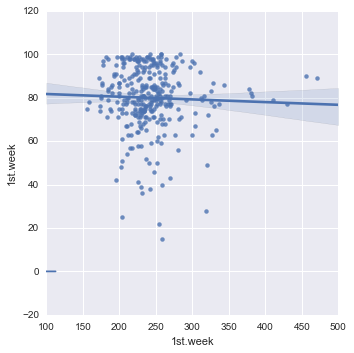

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
%matplotlib inline

sns.lmplot(x='length_in_secs', y='1st.week', data = billboard)
sns.distplot(billboard['1st.week'])
plt.show()

In [17]:
time_on_chart = []
time_dict = {}
#Return a 
for col in billboard.ix[:, 7:72]:
    print col
    count = 0
    for row in billboard[col]:
        count += 1
        if row > 0:
            print billboard.loc[count-1, 'track'], row
            time_on_chart.append([billboard.loc[count-1, 'track'], row])


        
# bb2 = pd.pivot_table(billboard, index = ['track', 'artist'])    
# print bb2

1st.week
Independent Women Part I 78.0
Maria, Maria 15.0
I Knew I Loved You 71.0
Music 41.0
Come On Over Baby (All I Want Is You) 57.0
Doesn't Really Matter 59.0
Say My Name 83.0
Be With You 63.0
Incomplete 77.0
Amazed 81.0
It's Gonna Be Me 82.0
What A Girl Wants 71.0
Everything You Want 70.0
With Arms Wide Open 84.0
Try Again 59.0
Bent 60.0
Thank God I Found You 82.0
Breathe 81.0
Case Of The Ex (Whatcha Gonna Do) 72.0
He Loves U Not 99.0
He Wasn't Man Enough 63.0
You Sang To Me 77.0
Give Me Just One Night (Una Noche) 51.0
Jumpin' Jumpin' 74.0
Kryptonite 81.0
Thong Song 74.0
I Turn To You 50.0
My Love Is Your Love 81.0
I Wanna Know 94.0
Get It On.. Tonite 92.0
Bye Bye Bye 42.0
The Real Slim Shady 70.0
Most Girls 85.0
Gotta Tell You 85.0
Bring It All To Me 73.0
Hot Boyz 36.0
I Try 68.0
This I Promise You 68.0
No More 76.0
Show Me The Meaning Of Being Lonely 74.0
Absolutely (Story Of A Girl) 85.0
That's The Way It Is 74.0
All The Small Things 89.0
Blue (Da Ba Dee) 67.0
Bag Lady 67.0
Ther

In [18]:
time = pd.DataFrame(time_on_chart, columns = ['track', 'ranking'])
print time

                                      track  ranking
0                  Independent Women Part I     78.0
1                              Maria, Maria     15.0
2                        I Knew I Loved You     71.0
3                                     Music     41.0
4     Come On Over Baby (All I Want Is You)     57.0
5                     Doesn't Really Matter     59.0
6                               Say My Name     83.0
7                               Be With You     63.0
8                                Incomplete     77.0
9                                    Amazed     81.0
10                         It's Gonna Be Me     82.0
11                        What A Girl Wants     71.0
12                      Everything You Want     70.0
13                      With Arms Wide Open     84.0
14                                Try Again     59.0
15                                     Bent     60.0
16                    Thank God I Found You     82.0
17                                  Breathe   

In [19]:
#This really hacky piece of code is the end of a long effort to figure out how long each song
# stayed on the top 100
time['track'].nunique()
timetime =pd.DataFrame(pd.value_counts(time['track']))
print timetime

                                                    track
Higher                                                 57
Amazed                                                 55
Breathe                                                53
Kryptonite                                             53
With Arms Wide Open                                    47
I Wanna Know                                           44
Everything You Want                                    41
Bent                                                   39
He Wasn't Man Enough                                   37
(Hot S**t) Country Grammar                             34
I Knew I Loved You                                     33
You Sang To Me                                         32
Jumpin' Jumpin'                                        32
There U Go                                             32
Get It On.. Tonite                                     32
Say My Name                                            32
Try Again     

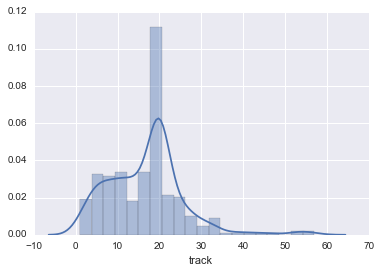

In [20]:
sns.distplot(timetime['track'])

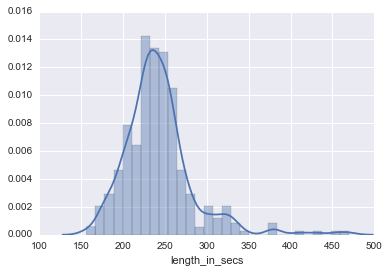

In [21]:
# This histogram shows how long tracks in the top 100 are. 
sns.distplot(billboard['length_in_secs'])

In [22]:
# genre_names= genre.index.values

# plt.bar([x for x in len(genre_count)], genre_count)

In [23]:
billboard.to_csv('billboard_data.csv')
print billboard.ix[:,7:72]

     1st.week  2nd.week  3rd.week  4th.week  5th.week  6th.week  7th.week  \
0        78.0      63.0      49.0      33.0      23.0      15.0       7.0   
1        15.0       8.0       6.0       5.0       2.0       3.0       2.0   
2        71.0      48.0      43.0      31.0      20.0      13.0       7.0   
3        41.0      23.0      18.0      14.0       2.0       1.0       1.0   
4        57.0      47.0      45.0      29.0      23.0      18.0      11.0   
5        59.0      52.0      43.0      30.0      29.0      22.0      15.0   
6        83.0      83.0      44.0      38.0      16.0      13.0      16.0   
7        63.0      45.0      34.0      23.0      17.0      12.0       9.0   
8        77.0      66.0      61.0      61.0      61.0      55.0       2.0   
9        81.0      54.0      44.0      39.0      38.0      33.0      29.0   
10       82.0      70.0      51.0      39.0      26.0      19.0      15.0   
11       71.0      51.0      28.0      18.0      13.0      13.0      11.0   

In [24]:
billboard.ix[:, '1st.week':'65th.week']

,1st.week,2nd.week,3rd.week,4th.week,5th.week,6th.week,7th.week,8th.week,9th.week,10th.week,...,56th.week,57th.week,58th.week,59th.week,60th.week,61st.week,62nd.week,63rd.week,64th.week,65th.week
0,78.0,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15.0,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,71.0,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41.0,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57.0,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,59.0,52.0,43.0,30.0,29.0,22.0,15.0,10.0,10.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,83.0,83.0,44.0,38.0,16.0,13.0,16.0,16.0,16.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,63.0,45.0,34.0,23.0,17.0,12.0,9.0,8.0,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,77.0,66.0,61.0,61.0,61.0,55.0,2.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,81.0,54.0,44.0,39.0,38.0,33.0,29.0,29.0,32.0,27.0,...,25.0,26.0,31.0,32.0,37.0,42.0,42.0,45.0,50.0,NaN


In [41]:
flip_bb = billboard.T

maxes = []
max_min={}
for series in flip_bb.ix[6:72,:]:
    print flip_bb.ix['track', series]
    print flip_bb.ix['1st.week':'65th.week', series].min()
    print flip_bb.ix['1st.week':'65th.week', series].max()
    maxes.append([(flip_bb.ix['track', series]), (flip_bb.ix['1st.week':'65th.week', series].min())])
    max_min[(flip_bb.ix['track',series])]=[flip_bb.ix['1st.week':'65th.week', series].min(),
                                             flip_bb.ix['1st.week':'65th.week', series].max(),
                                          (flip_bb.ix['track',series])]
max_min

Independent Women Part I
1.0
78.0
Maria, Maria
1.0
48.0
I Knew I Loved You
1.0
71.0
Music
1.0
44.0
Come On Over Baby (All I Want Is You)
1.0
57.0
Doesn't Really Matter
1.0
59.0
Say My Name
1.0
83.0
Be With You
1.0
63.0
Incomplete
1.0
77.0
Amazed
1.0
81.0
It's Gonna Be Me
1.0
82.0
What A Girl Wants
1.0
71.0
Everything You Want
1.0
70.0
With Arms Wide Open
1.0
86.0
Try Again
1.0
59.0
Bent
1.0
60.0
Thank God I Found You
1.0
89.0
Breathe
2.0
81.0
Case Of The Ex (Whatcha Gonna Do)
2.0
72.0
He Loves U Not
2.0
99.0
He Wasn't Man Enough
2.0
63.0
You Sang To Me
2.0
77.0
Give Me Just One Night (Una Noche)
2.0
94.0
Jumpin' Jumpin'
3.0
74.0
Kryptonite
3.0
81.0
Thong Song
3.0
74.0
I Turn To You
3.0
50.0
My Love Is Your Love
4.0
81.0
I Wanna Know
4.0
94.0
Get It On.. Tonite
4.0
92.0
Bye Bye Bye
4.0
42.0
The Real Slim Shady
4.0
98.0
Most Girls
4.0
85.0
Gotta Tell You
4.0
85.0
Bring It All To Me
5.0
73.0
Hot Boyz
5.0
38.0
I Try
5.0
68.0
This I Promise You
5.0
68.0
No More
5.0
76.0
Show Me The Meaning 

{'(Hot S**t) Country Grammar': [7.0, 100.0, '(Hot S**t) Country Grammar'],
 '3 Little Words': [89.0, 99.0, '3 Little Words'],
 '911': [38.0, 96.0, '911'],
 'A Country Boy Can Survive': [75.0, 93.0, 'A Country Boy Can Survive'],
 'A Little Gasoline': [75.0, 99.0, 'A Little Gasoline'],
 'A Puro Dolor (Purest Of Pain)': [26.0,
  80.0,
  'A Puro Dolor (Purest Of Pain)'],
 "Aaron's Party (Come Get It)": [35.0, 100.0, "Aaron's Party (Come Get It)"],
 'Absolutely (Story Of A Girl)': [6.0, 85.0, 'Absolutely (Story Of A Girl)'],
 'All Good?': [96.0, 100.0, 'All Good?'],
 'All The Small Things': [6.0, 89.0, 'All The Small Things'],
 'Amazed': [1.0, 81.0, 'Amazed'],
 'American Pie': [29.0, 88.0, 'American Pie'],
 'Angels': [53.0, 96.0, 'Angels'],
 'Another Dumb Blonde': [27.0, 100.0, 'Another Dumb Blonde'],
 'Another Nine Minutes': [74.0, 95.0, 'Another Nine Minutes'],
 'Anything': [55.0, 92.0, 'Anything'],
 'As We Lay': [64.0, 89.0, 'As We Lay'],
 'Auld Lang Syne (The Millenium Mix)': [7.0,
  89

In [43]:
#This creates a dataframe out of a dictionary that contains the highest and lowest point a song
#existed on the billboard charts
jumps = pd.DataFrame.from_dict(max_min, orient='index')
jumps

,0,1,2
You Can Do It,35.0,89.0,You Can Do It
When You Need My Love,75.0,99.0,When You Need My Love
Still In My Heart,88.0,98.0,Still In My Heart
Blue (Da Ba Dee),6.0,88.0,Blue (Da Ba Dee)
That's The Way It Is,6.0,74.0,That's The Way It Is
It's Gonna Be Me,1.0,82.0,It's Gonna Be Me
From The Bottom Of My Broken Heart,14.0,97.0,From The Bottom Of My Broken Heart
Don't Say You Love Me,21.0,98.0,Don't Say You Love Me
Do You,91.0,100.0,Do You
I Don't Wanna,35.0,86.0,I Don't Wanna


In [44]:
jumps.rename(columns={0:'highest',1:'lowest', 2:'track'}, inplace=True)
for series in jumps:
    jumps['range'] = jumps['lowest']-jumps['highest']
jumps
jumps.index.name = 'track'
print jumps.index.name
jumps

track


,highest,lowest,track,range
track,,,,
You Can Do It,35.0,89.0,You Can Do It,54.0
When You Need My Love,75.0,99.0,When You Need My Love,24.0
Still In My Heart,88.0,98.0,Still In My Heart,10.0
Blue (Da Ba Dee),6.0,88.0,Blue (Da Ba Dee),82.0
That's The Way It Is,6.0,74.0,That's The Way It Is,68.0
It's Gonna Be Me,1.0,82.0,It's Gonna Be Me,81.0
From The Bottom Of My Broken Heart,14.0,97.0,From The Bottom Of My Broken Heart,83.0
Don't Say You Love Me,21.0,98.0,Don't Say You Love Me,77.0
Do You,91.0,100.0,Do You,9.0


In [45]:
bb_plus=pd.merge(billboard, jumps, on='track')


bb_plus

,year,artist,track,length_in_secs,genre,date.entered,date.peaked,1st.week,2nd.week,3rd.week,...,60th.week,61st.week,62nd.week,63rd.week,64th.week,65th.week,time_to_peak,highest,lowest,range
0,2000,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,56 days,1.0,78.0,77.0
1,2000,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,56 days,1.0,48.0,47.0
2,2000,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,98 days,1.0,71.0,70.0
3,2000,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41.0,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,35 days,1.0,44.0,43.0
4,2000,Christina Aguilera,Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57.0,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,70 days,1.0,57.0,56.0
5,2000,Janet,Doesn't Really Matter,257,Rock,2000-06-17,2000-08-26,59.0,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,70 days,1.0,59.0,58.0
6,2000,Destiny's Child,Say My Name,271,Rock,1999-12-25,2000-03-18,83.0,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,84 days,1.0,83.0,82.0
7,2000,Enrique Iglesias,Be With You,216,Latin,2000-04-01,2000-06-24,63.0,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,84 days,1.0,63.0,62.0
8,2000,Sisqo,Incomplete,232,Rock,2000-06-24,2000-08-12,77.0,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,49 days,1.0,77.0,76.0
9,2000,Lonestar,Amazed,265,Country,1999-06-05,2000-03-04,81.0,54.0,44.0,...,37.0,42.0,42.0,45.0,50.0,NaN,273 days,1.0,81.0,80.0


In [33]:
df = pd.melt(billboard, id_vars='track', value_vars=['1st.week','65th.week'])
df

,track,variable,value
0,Independent Women Part I,1st.week,78.0
1,"Maria, Maria",1st.week,15.0
2,I Knew I Loved You,1st.week,71.0
3,Music,1st.week,41.0
4,Come On Over Baby (All I Want Is You),1st.week,57.0
5,Doesn't Really Matter,1st.week,59.0
6,Say My Name,1st.week,83.0
7,Be With You,1st.week,63.0
8,Incomplete,1st.week,77.0
9,Amazed,1st.week,81.0


In [31]:
jumps

,highest,lowest,range
track,,,
You Can Do It,35.0,89.0,54.0
When You Need My Love,75.0,99.0,24.0
Still In My Heart,88.0,98.0,10.0
Blue (Da Ba Dee),6.0,88.0,82.0
That's The Way It Is,6.0,74.0,68.0
It's Gonna Be Me,1.0,82.0,81.0
From The Bottom Of My Broken Heart,14.0,97.0,83.0
Don't Say You Love Me,21.0,98.0,77.0
Do You,91.0,100.0,9.0
